In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Epoch 1/1000
1/1 [==============================] - 1s 529ms/step - loss: 9.0705
Epoch 2/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.4171
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0201
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0010
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 9.6069e-04
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 9.5091e-04
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 9.4285e-04
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 9.3494e-04
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.2710e-04
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 9.1933e-04
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 9.1163e-04
Epoch 13/100

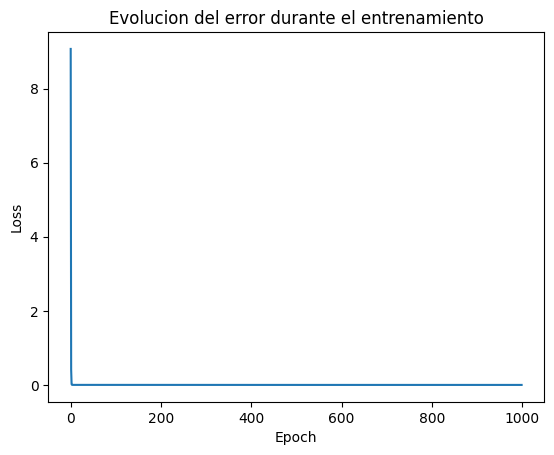

In [ ]:
#Definimos los datos de entrenamiento
x_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([2,4,6,8,10,12,14,16,18,20])

#Definimos el modelo en Keras
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(loss="mean_squared_error",optimizer=SGD(learning_rate=0.01))

#Entrenemos el modelo
history = model.fit(x_train,y_train,epochs=1000,verbose=1)

#Imprimimos el error
losses = history.history['loss']

#Graficamos la evolución del error durante el entrenamiento

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Evolucion del error durante el entrenamiento")
plt.show()



1/1 [==============================] - 0s 107ms/step


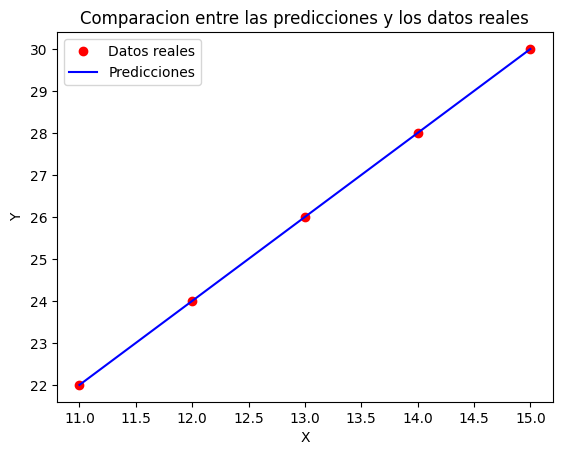

In [ ]:
#Generamos predicciones y calculamos el error en un conjunto de prueba
x_test = np.array([11,12,13,14,15])
y_test = np.array([22,24,26,28,30])
y_pred = model.predict(x_test)

mse=np.mean((y_test - y_pred.squeeze())**2)

#Graficamos la comparación entre las predicciones y los datos reales

plt.plot(x_test, y_test, "ro", label="Datos reales")
plt.plot(x_test, y_pred, "b", label="Predicciones")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Comparacion entre las predicciones y los datos reales")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score



In [ ]:
df=pd.read_csv('/content/Ice Cream Sales - temperatures.csv')
df.head(10)


,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
5,43,15.88
6,44,19.07
7,44,19.57
8,45,21.62
9,45,22.34


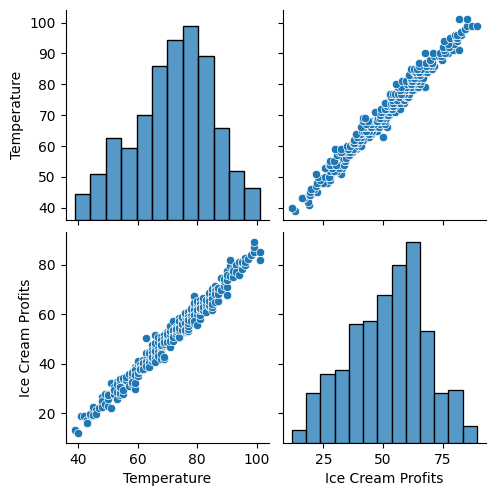

In [ ]:
df = df.loc[:, ['Temperature','Ice Cream Profits']]          #se seleccionan solo esas columnas para realizar el pairplot
sns.pairplot(df)
plt.show()

Temperature          float64
Ice Cream Profits    float64
dtype: object


[Text(0.5, 0, 'Temperature'), Text(0, 0.5, 'Ice Cream Sales')]

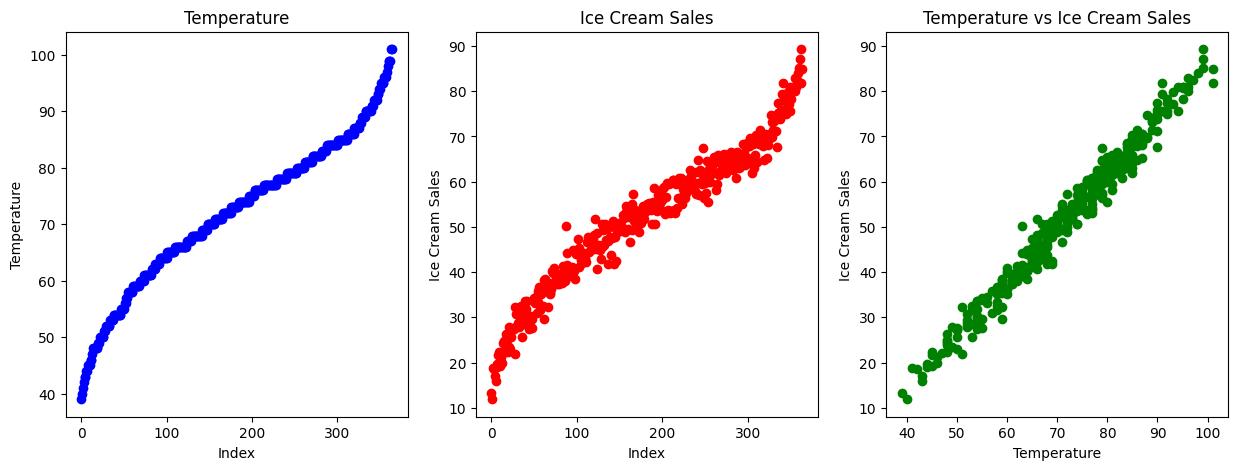

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Crear el DataFrame con los datos proporcionados
# Supongamos que tu DataFrame se llama 'df'
# df = pd.DataFrame(data)

# Convertir las columnas a tipo flotante
df['Temperature'] = df['Temperature'].astype(float)
df['Ice Cream Profits'] = df['Ice Cream Profits'].astype(float)

# Crear arreglos con los datos convertidos
temperature = df['Temperature'].to_numpy()
ice_cream_sales = df['Ice Cream Profits'].to_numpy()

# Verificar el tipo de datos después de la conversión
print(df.dtypes)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Realizar la dispersión del arreglo de temperatura
axs[0].scatter(range(len(temperature)), temperature, color='blue')
axs[0].set_title('Temperature')
axs[0].set(xlabel='Index', ylabel='Temperature')

# Dispersión de las ventas de helados
axs[1].scatter(range(len(ice_cream_sales)), ice_cream_sales, color='red')
axs[1].set_title('Ice Cream Sales')
axs[1].set(xlabel='Index', ylabel='Ice Cream Sales')

# Dispersión de temperatura vs ventas de helados
axs[2].scatter(temperature, ice_cream_sales, color='green')
axs[2].set_title('Temperature vs Ice Cream Sales')
axs[2].set(xlabel='Temperature', ylabel='Ice Cream Sales')

Mean Squared Error: 5.294200791081213


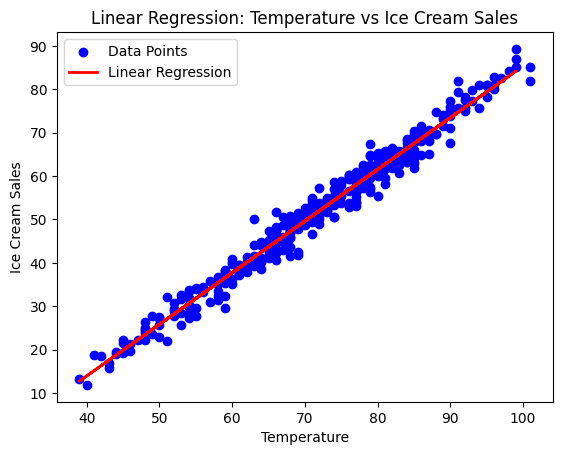

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(temperature, ice_cream_sales, test_size=0.2, random_state=42)
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Graficar la regresión lineal junto con los datos
plt.scatter(temperature, ice_cream_sales, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression: Temperature vs Ice Cream Sales')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.legend()
plt.show()

Linear Model Mean Squared Error: 5.294200791081213
3/3 [==============================] - 0s 3ms/step
Neural Network Model Mean Squared Error: 55.57459898973642


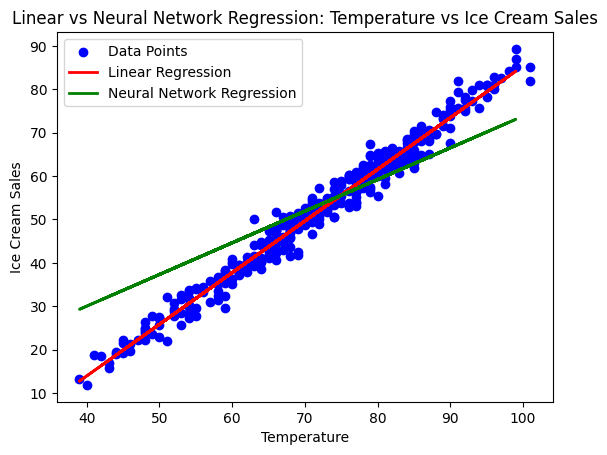

In [ ]:
# Crear arreglos con los datos convertidos
temperature = df['Temperature'].to_numpy().reshape(-1, 1)
ice_cream_sales = df['Ice Cream Profits'].to_numpy()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(temperature, ice_cream_sales, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal como referencia
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) para el modelo lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Model Mean Squared Error: {mse_linear}')

# Crear y entrenar el modelo de regresión con red neuronal
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
model.fit(X_train, y_train, epochs=100, verbose=0)

# Realizar predicciones en el conjunto de prueba
y_pred_nn = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) para el modelo de red neuronal
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Neural Network Model Mean Squared Error: {mse_nn}')

# Graficar los resultados
plt.scatter(temperature, ice_cream_sales, color='blue', label='Data Points')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Linear Regression')
plt.plot(X_test, y_pred_nn, color='green', linewidth=2, label='Neural Network Regression')
plt.title('Linear vs Neural Network Regression: Temperature vs Ice Cream Sales')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.legend()
plt.show()

Ingresa las temperaturas separadas por espacios: 78 98 88 45 98 65 78 98 65 87 45 98 65 75 88 99
1/1 [==============================] - 0s 21ms/step
Resultados para Temperaturas = [78. 98. 88. 45. 98. 65. 78. 98. 65. 87. 45. 98. 65. 75. 88. 99.]
Regresión Lineal: Predicciones de Ventas de Helados = [59.17107629 82.97408547 71.07258088 19.89611113 82.97408547 43.69912032
 59.17107629 82.97408547 43.69912032 69.88243042 19.89611113 82.97408547
 43.69912032 55.60062491 71.07258088 84.16423593]
Red Neuronal: Predicciones de Ventas de Helados = [[57.75124 ]
 [72.341255]
 [65.04625 ]
 [33.67771 ]
 [72.341255]
 [48.267727]
 [57.75124 ]
 [72.341255]
 [48.267727]
 [64.31675 ]
 [33.67771 ]
 [72.341255]
 [48.267727]
 [55.562737]
 [65.04625 ]
 [73.070755]]


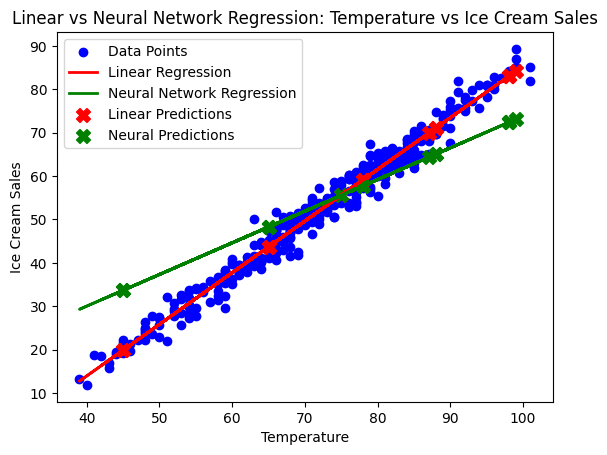

In [ ]:
# Ingresa tus propios arreglos de temperatura
temperature_inputs = np.array([float(x) for x in input("Ingresa las temperaturas separadas por espacios: ").split()])

# Realiza predicciones con el modelo de regresión lineal
predictions_linear = linear_model.predict(temperature_inputs.reshape(-1, 1))

# Realiza predicciones con el modelo de red neuronal
predictions_nn = model.predict(temperature_inputs.reshape(-1, 1))

# Muestra los resultados
print(f'Resultados para Temperaturas = {temperature_inputs}')
print(f'Regresión Lineal: Predicciones de Ventas de Helados = {predictions_linear}')
print(f'Red Neuronal: Predicciones de Ventas de Helados = {predictions_nn}')

# Graficar la comparación de resultados
plt.scatter(temperature, ice_cream_sales, color='blue', label='Data Points')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Linear Regression')
plt.plot(X_test, y_pred_nn, color='green', linewidth=2, label='Neural Network Regression')
plt.scatter(temperature_inputs, predictions_linear, color='red', marker='X', s=100, label='Linear Predictions')
plt.scatter(temperature_inputs, predictions_nn, color='green', marker='X', s=100, label='Neural Predictions')
plt.title('Linear vs Neural Network Regression: Temperature vs Ice Cream Sales')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.legend()
plt.show()